In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Load the dataset
data = pd.read_csv("Data.csv")

In [ ]:
# Display the shape of the dataset
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
# Display the shape of the dataset
data.shape

(25192, 42)

In [ ]:
# Check for missing values
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
# Check for duplicate rows
data.duplicated().sum()

0

In [ ]:
# Display descriptive statistics of the dataset
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Encode categorical features using LabelEncoder
categorical_col = ['protocol_type','service','flag','class']
le = LabelEncoder()
for col in categorical_col:
    data[col] = le.fit_transform(data[col])

In [ ]:
# Print label mapping for the 'class' column
label_mapping = {index: label for index, label in enumerate(le.classes_)}
print("Label Mapping for 'class':", label_mapping)

Label Mapping for 'class': {0: 'anomaly', 1: 'normal'}


In [ ]:
# Display the data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  float64
 1   protocol_type                25192 non-null  float64
 2   service                      25192 non-null  float64
 3   flag                         25192 non-null  float64
 4   src_bytes                    25192 non-null  float64
 5   dst_bytes                    25192 non-null  float64
 6   land                         25192 non-null  float64
 7   wrong_fragment               25192 non-null  float64
 8   urgent                       25192 non-null  float64
 9   hot                          25192 non-null  float64
 10  num_failed_logins            25192 non-null  float64
 11  logged_in                    25192 non-null  float64
 12  num_compromised              25192 non-null  float64
 13  root_shell      

In [ ]:
# Select numerical features for scaling
numerical_col = data.select_dtypes(include=['int64','float64']).columns
filtered_col = []
for col in numerical_col:
    if col not in ['class']:
        filtered_col.append(col)

In [ ]:
filtered_columns

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [ ]:
# Scale numerical features using StandardScaler
scaler = StandardScaler()
data[filtered_col] = scaler.fit_transform(data[filtered_col])

In [ ]:
# Display the correlation matrix
data.corr().iloc[-1]

duration                      -0.050901
protocol_type                  0.283653
service                       -0.270494
flag                           0.651309
src_bytes                     -0.005743
dst_bytes                      0.010949
land                          -0.000605
wrong_fragment                -0.097625
urgent                        -0.006743
hot                            0.012839
num_failed_logins             -0.000028
logged_in                      0.688084
num_compromised                0.018620
root_shell                     0.018579
su_attempted                   0.025851
num_root                       0.019753
num_file_creations             0.018322
num_shells                     0.013454
num_access_files               0.036999
num_outbound_cmds                   NaN
is_host_login                       NaN
is_guest_login                 0.038662
count                         -0.578790
srv_count                     -0.002370
serror_rate                   -0.649952


In [ ]:
# Select features for the model
feature_col = ['protocol_type','flag','dst_bytes','hot','logged_in','num_compromised','root_shell','su_attempted','num_root',
               'num_file_creations','num_shells','num_access_files','is_guest_login','same_srv_rate','srv_diff_host_rate','dst_host_srv_count'
               ,'dst_host_same_srv_rate']

In [ ]:
x = data[feature_col]
y = data['class']

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [ ]:
# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
# Train an XGBoost Classifier
xgb = XGBClassifier(n_estimators=100,learning_rate=0.1)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Make predictions using both models
rf_pred = rf.predict(x_test)
xgb_pred = xgb.predict(x_test)

In [ ]:
# Define a function to evaluate the models
import seaborn as sns
def eval(y_test,y_pred,model_name,model):
    print(f"Using {model_name}:")
    print("Accuracy Score:",accuracy_score(y_test,y_pred)*100)
    print("Precision Score:",precision_score(y_test,y_pred)*100)
    print("Recall Score:",recall_score(y_test,y_pred)*100)
    print("F1 Score:",f1_score(y_test,y_pred)*100)
    print("Confusion Matrix:")
    conf = confusion_matrix(y_test, y_pred)
    labels = ['Normal', 'Anamoly']
    conf_mat = ConfusionMatrixDisplay(conf, display_labels=labels)
    fig, ax = plt.subplots(figsize=(8, 6))
    conf_mat.plot(ax=ax, cmap=plt.cm.Blues, values_format='.0f')
    plt.show()
    feature_importance = model.feature_importances_
    importance_df = pd.DataFrame({'Feature': feature_col, 'Importance': feature_importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(10,5))
    sns.barplot(x=importance_df.Importance, y=importance_df.Feature, hue=importance_df.Feature, palette='viridis')
    plt.title('Feature Importance')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.show()

Using Random Forest Classifier:
Accuracy Score: 98.74975193490772
Precision Score: 98.84025439580995
Recall Score: 98.80329094988781
F1 Score: 98.82176921638302
Confusion Matrix:


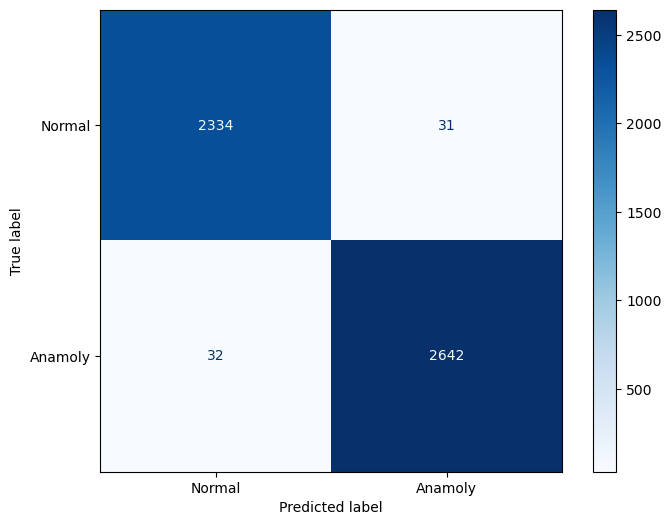

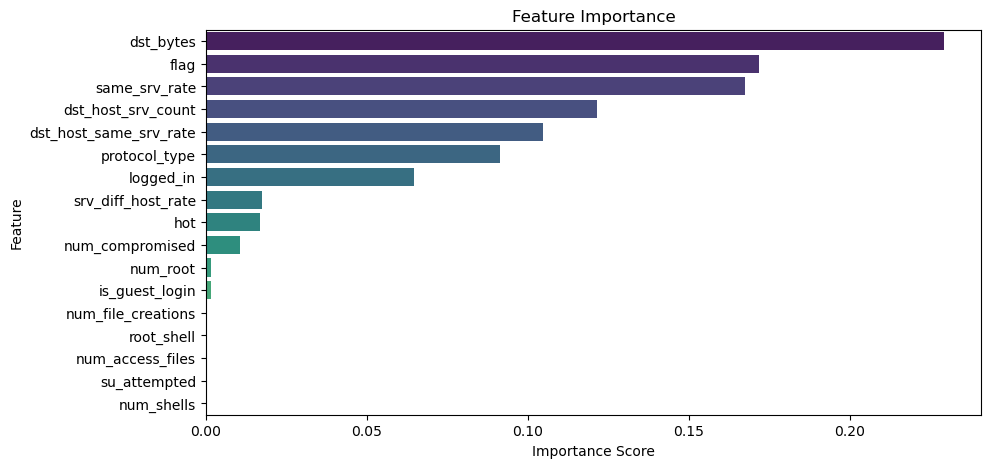

In [ ]:
# Evaluate the Random Forest Classifier
eval(y_test,rf_pred,"Random Forest Classifier",rf)

Using XGBoost Classifier:
Accuracy Score: 98.80928755705497
Precision Score: 99.39531368102796
Recall Score: 98.35452505609574
F1 Score: 98.87218045112782
Confusion Matrix:


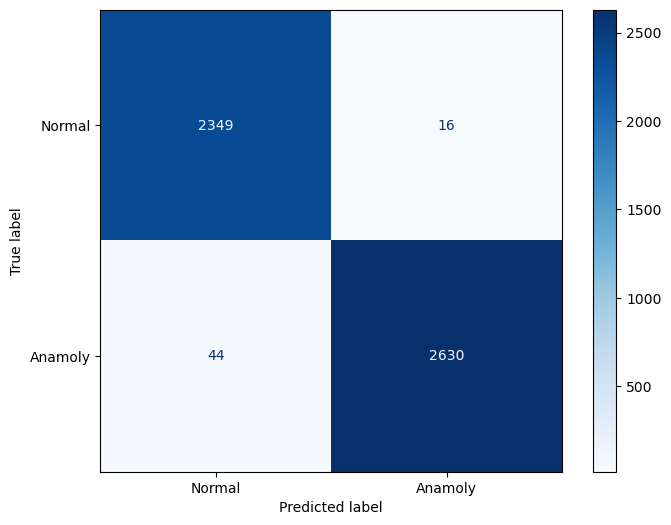

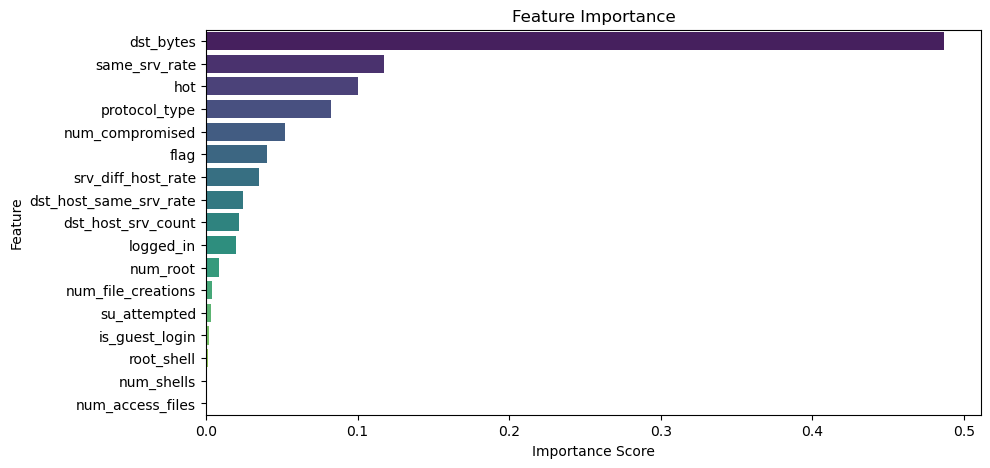

In [ ]:
# Evaluate the XGBoost Classifier
eval(y_test,xgb_pred,"XGBoost Classifier",xgb)